In [79]:
import pandas as pd
import numpy as np

### Reading our data file which is in .xlsx i.e Excel Sheet format

In [80]:
CancerData = pd.read_excel("Innovaccer/BreastCancer_Prognostic_v1.xlsx")
CancerData

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [81]:
#There are 35 features extracted from the tumors.
CancerData.columns.size

35

In [82]:
#List of features/columns
CancerData.columns

Index(['ID', 'Outcome', 'Time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_std_dev', 'texture_std_dev',
       'perimeter_std_dev', 'area_std_dev', 'smoothness_std_dev',
       'compactness_std_dev', 'concavity_std_dev', 'concave_points_std_dev',
       'symmetry_std_dev', 'fractal_dimension_std_dev', 'Worst_radius',
       'Worst_texture', 'Worst_perimeter', 'Worst_area', 'Worst_smoothness',
       'Worst_compactness', 'Worst_concavity', 'Worst_concave_points',
       'Worst_symmetry', 'Worst_fractal_dimension', 'Tumor_Size',
       'Lymph_Node_Status'],
      dtype='object')

# Dataset Preparation

#### Apparently there is not a single null value in our dataset.

In [83]:
CancerData.isnull().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

In [84]:
# For our ease lets chamge the order of our dataframe and drop that ID frame
columns_list = list(CancerData.columns)
columns_list.remove("ID")
new = columns_list[2:] + columns_list[:2]
new
CancerData = CancerData[new]


In [85]:
CancerData

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status,Outcome,Time
0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,...,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5,N,31
1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2,N,61
2,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,...,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0,N,116
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0,N,123
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0,R,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,...,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2,N,10
194,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,...,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0,N,8
195,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,...,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0,N,12
196,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,...,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?,R,3


In [86]:
CancerData.dtypes

radius_mean                  float64
texture_mean                 float64
perimeter_mean               float64
area_mean                    float64
smoothness_mean              float64
compactness_mean             float64
concavity_mean               float64
concave_points_mean          float64
symmetry_mean                float64
fractal_dimension_mean       float64
radius_std_dev               float64
texture_std_dev              float64
perimeter_std_dev            float64
area_std_dev                 float64
smoothness_std_dev           float64
compactness_std_dev          float64
concavity_std_dev            float64
concave_points_std_dev       float64
symmetry_std_dev             float64
fractal_dimension_std_dev    float64
Worst_radius                 float64
Worst_texture                float64
Worst_perimeter              float64
Worst_area                   float64
Worst_smoothness             float64
Worst_compactness            float64
Worst_concavity              float64
W

In [87]:
# Since that '?' string will cause troubles in our analysis
CancerData = CancerData[CancerData["Lymph_Node_Status"] != "?"]
CancerData["Lymph_Node_Status"] = CancerData["Lymph_Node_Status"].astype("int64")
CancerData.Outcome[CancerData["Outcome"] == "R"] = 1
CancerData.Outcome[CancerData["Outcome"] == "N"] = 0
CancerData.Outcome = CancerData.Outcome.astype("int64")

C:\Users\bheru\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bheru\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\bheru\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [88]:
#Lets see the statistical data of each feature
CancerData.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status,Outcome,Time
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,0.192885,0.062743,...,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340,0.237113,46.938144
std,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,0.027679,0.007289,...,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276,0.426413,34.523646
min,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,...,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000,0.000000,1.000000
25%,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,0.174075,0.056718,...,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000,0.000000,14.250000
50%,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,0.189350,0.061715,...,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000,0.000000,39.500000
75%,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,0.209550,0.066810,...,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000,0.000000,73.000000
max,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000,1.000000,125.000000


## Analyzing the data using correlation plot

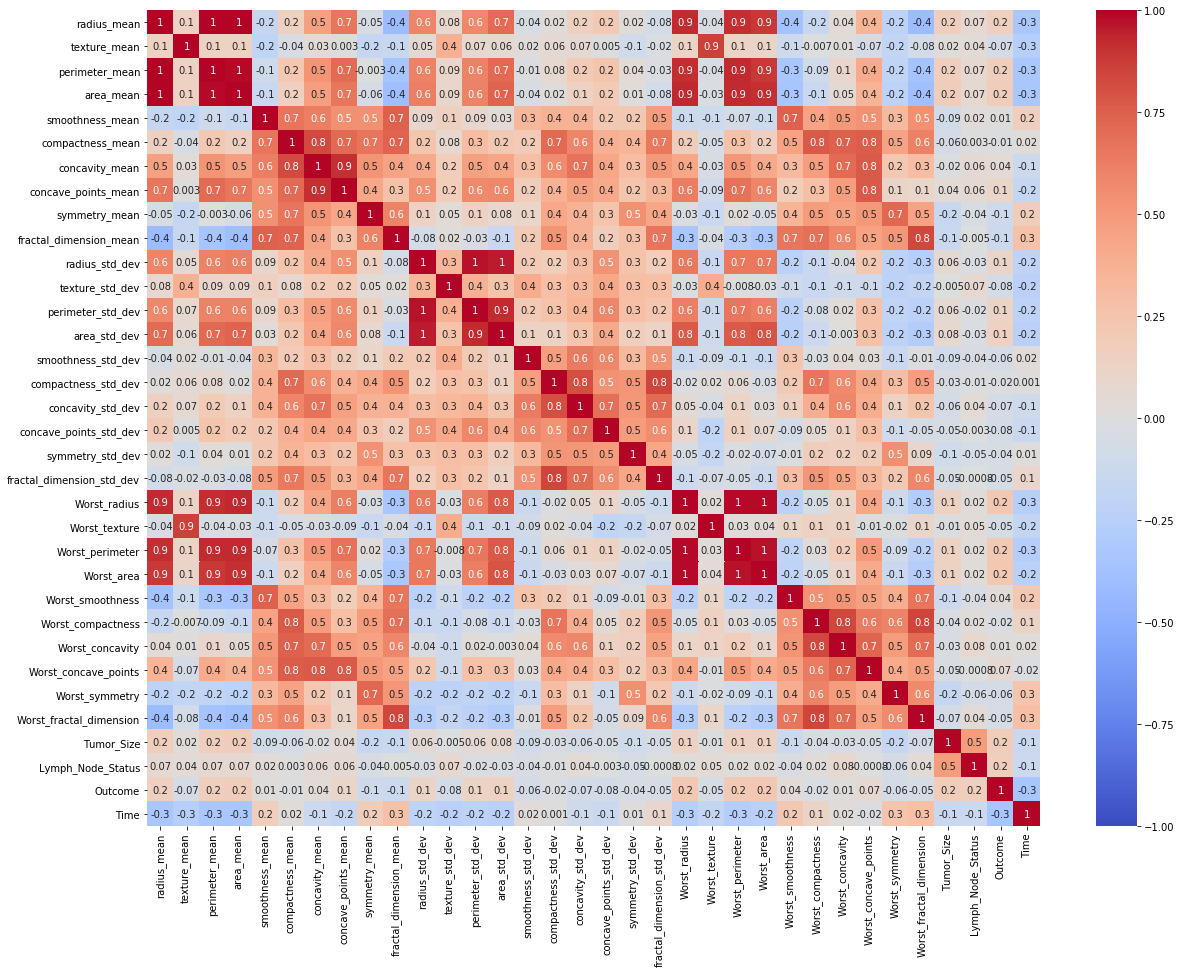

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_data = CancerData.corr()
plt.subplots(figsize = (20,15))
sns.heatmap(corr_data, xticklabels=corr_data.columns, yticklabels=corr_data.columns, annot=True, fmt = ".1g",vmin = -1,vmax = 1,center = 0,cmap = "coolwarm")

### Important points to note - 
#### 1. Since Area and Perimeter are a function of radius. hence they have high correlation with the radius.
#### 2. Our cutoff Correlation coefficient range must be -0.8 to 0.8

# Classification without feature selection

In [90]:
X = CancerData[['Time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_std_dev', 'texture_std_dev',
       'perimeter_std_dev', 'area_std_dev', 'smoothness_std_dev',
       'compactness_std_dev', 'concavity_std_dev', 'concave_points_std_dev',
       'symmetry_std_dev', 'fractal_dimension_std_dev', 'Worst_radius',
       'Worst_texture', 'Worst_perimeter', 'Worst_area', 'Worst_smoothness',
       'Worst_compactness', 'Worst_concavity', 'Worst_concave_points',
       'Worst_symmetry', 'Worst_fractal_dimension', 'Tumor_Size',
       'Lymph_Node_Status']]
Y = CancerData["Outcome"]

In [91]:
from sklearn.metrics import confusion_matrix, f1_score

### 1. Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
logreg = LogisticRegression(max_iter = 100)
logreg.fit(X_train, y_train)

C:\Users\bheru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [94]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[38,  0],
       [ 9,  2]], dtype=int64)

### 2. Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [96]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.85


In [97]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[45,  1],
       [ 8,  5]], dtype=int64)

In [98]:
from sklearn.metrics import precision_recall_fscore_support
score = precision_recall_fscore_support(y_test, y_pred,average = "weighted")
print(score)

(0.8455921543545466, 0.847457627118644, 0.8247506284972833, None)


### 3. Support Vector Machine

In [99]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.80


In [101]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[37,  1],
       [ 9,  2]], dtype=int64)

In [102]:
from sklearn.metrics import precision_recall_fscore_support
score = precision_recall_fscore_support(y_test, y_pred,average = "weighted")
print(score)

(0.7734398107068914, 0.7959183673469388, 0.7473275024295433, None)


### 4. Random Forest


In [103]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 0)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
y_pred=clf.predict(X_test)

In [105]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.78


In [106]:
from sklearn.metrics import precision_recall_fscore_support
score = precision_recall_fscore_support(y_test, y_pred,average = "weighted")
print(score)

(0.7256913470115968, 0.7796610169491526, 0.7106357303494049, None)


### 5 . Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [108]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [109]:
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.75


# Feature Selection 1

In [120]:
# Dropping the features which are out of the acceptable corr. coeff. range i.e (-0.8 , 0.8)

In [121]:
CancerData_1 = CancerData.drop(["perimeter_mean" , "area_mean" , "Worst_radius","Worst_perimeter","Worst_area","Worst_texture","concavity_mean","Worst_compactness","Worst_concave_points","Worst_fractal_dimension","perimeter_std_dev","area_std_dev","fractal_dimension_std_dev","concave_points_std_dev","concavity_std_dev"],axis = 1)

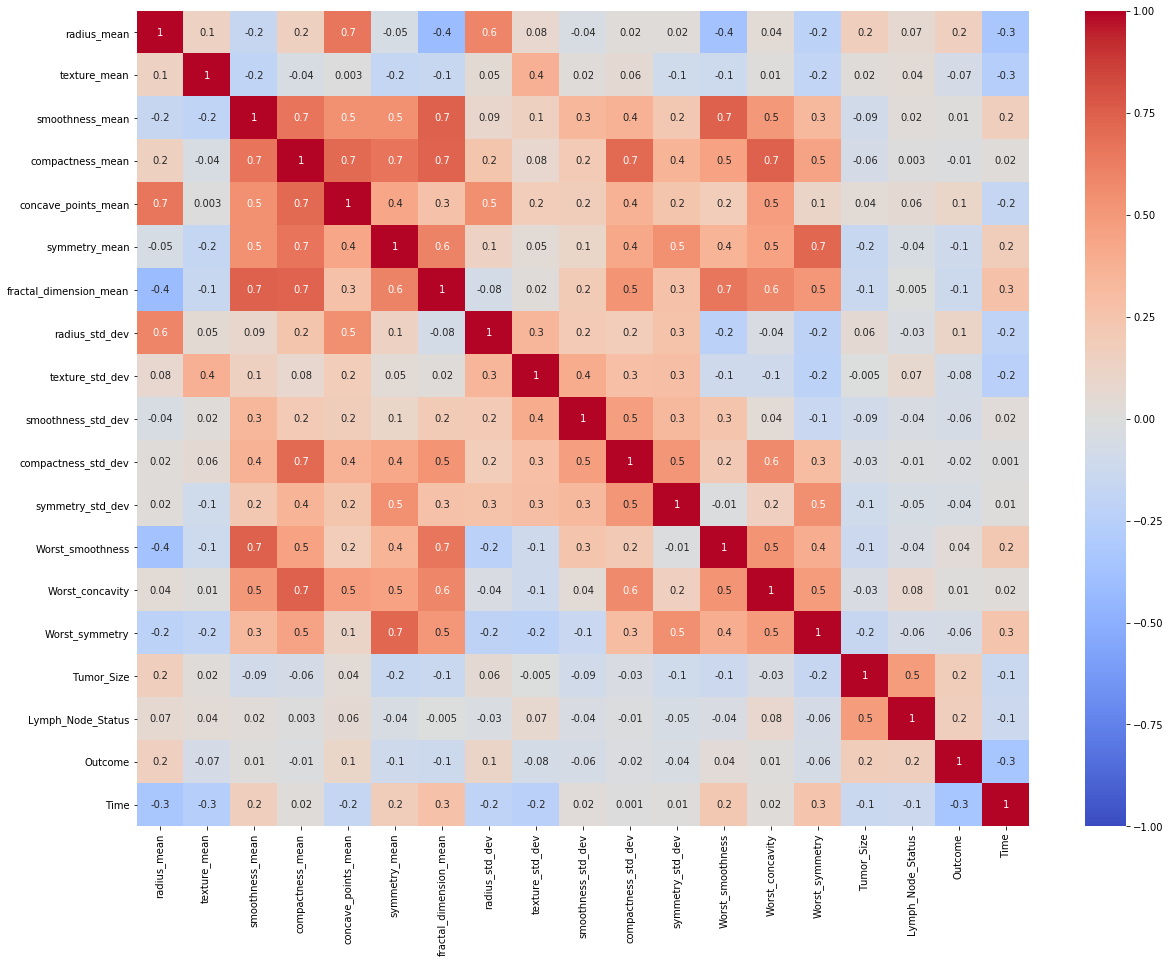

In [122]:
#New Plot looks more varied now
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_data = CancerData_1.corr()
plt.subplots(figsize = (20,15))
sns.heatmap(corr_data, xticklabels=corr_data.columns, yticklabels=corr_data.columns, annot=True, fmt = ".1g",vmin = -1,vmax = 1,center = 0,cmap = "coolwarm")

In [123]:
CancerData_1.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std_dev', 'texture_std_dev', 'smoothness_std_dev',
       'compactness_std_dev', 'symmetry_std_dev', 'Worst_smoothness',
       'Worst_concavity', 'Worst_symmetry', 'Tumor_Size', 'Lymph_Node_Status',
       'Outcome', 'Time'],
      dtype='object')

## Let us build our classifier model now

### 1. Logistic regression

In [124]:
X = CancerData_1[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std_dev', 'texture_std_dev', 'smoothness_std_dev',
       'compactness_std_dev', 'symmetry_std_dev', 'Worst_smoothness',
       'Worst_concavity', 'Worst_symmetry', 'Tumor_Size', 'Lymph_Node_Status','Time']]
Y = CancerData_1["Outcome"]

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bheru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [127]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[46,  0],
       [10,  3]], dtype=int64)

### 2. Decision Trees

In [128]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [129]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.69


In [130]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[25,  5],
       [ 7,  2]], dtype=int64)

### 3. Support Vector Machine

In [131]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.82


In [133]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[38,  0],
       [ 9,  2]], dtype=int64)

### 4. Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 0)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.78


### 5. Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [137]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [138]:
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.68


# Feature Selection 2

### ANOVA Statistics

In [485]:
X = CancerData[['Time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_std_dev', 'texture_std_dev',
       'perimeter_std_dev', 'area_std_dev', 'smoothness_std_dev',
       'compactness_std_dev', 'concavity_std_dev', 'concave_points_std_dev',
       'symmetry_std_dev', 'fractal_dimension_std_dev', 'Worst_radius',
       'Worst_texture', 'Worst_perimeter', 'Worst_area', 'Worst_smoothness',
       'Worst_compactness', 'Worst_concavity', 'Worst_concave_points',
       'Worst_symmetry', 'Worst_fractal_dimension', 'Tumor_Size',
       'Lymph_Node_Status']]
Y = CancerData["Outcome"]

In [486]:
from sklearn.feature_selection import f_classif
var_rel = f_classif(X,Y)
var_rel

(array([2.61170987e+01, 5.28279549e+00, 9.42402235e-01, 5.35155026e+00,
        6.33119199e+00, 3.14079140e-02, 2.54843205e-02, 3.26953417e-01,
        2.09010403e+00, 2.00706793e+00, 2.81234568e+00, 2.58767182e+00,
        1.17027751e+00, 2.88929277e+00, 3.61048889e+00, 6.88473296e-01,
        5.28629996e-02, 9.75748627e-01, 1.16697669e+00, 3.21685126e-01,
        4.49973576e-01, 9.86851221e+00, 5.05606504e-01, 9.49541965e+00,
        1.00297675e+01, 2.48366666e-01, 1.09139888e-01, 3.13384240e-02,
        8.90823049e-01, 7.44021332e-01, 5.59164326e-01, 5.93347591e+00,
        5.65575554e+00]),
 array([7.72981575e-07, 2.26141694e-02, 3.32882166e-01, 2.17630411e-02,
        1.26823448e-02, 8.59520220e-01, 8.73333982e-01, 5.68127369e-01,
        1.49886270e-01, 1.58188126e-01, 9.51688031e-02, 1.09341593e-01,
        2.80701051e-01, 9.07894515e-02, 5.89148085e-02, 4.07714601e-01,
        8.18399051e-01, 3.24493848e-01, 2.81378404e-01, 5.71259215e-01,
        5.03153633e-01, 1.94752919e-03

In [487]:
from sklearn.feature_selection import SelectKBest
K_Best_Features = SelectKBest(f_classif , k = 10)
features_new = K_Best_Features.fit_transform(X,Y)
features_new.shape
X_new = features_new

## Lets build our classifier model now

### 1. Logistic Regression

In [432]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bheru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [433]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [434]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[44,  2],
       [11,  2]], dtype=int64)

### 2. Decision Trees

In [435]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state = 0)
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 0,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [436]:
y_pred = clf_gini.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.61


In [437]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[32, 14],
       [ 9,  4]], dtype=int64)

### 3. Support Vector Machine

In [438]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [439]:
y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.80


In [440]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[37,  1],
       [ 9,  2]], dtype=int64)

## Final Classification Model:
### Decision tree Algorithm with all the features used.